<a href="https://colab.research.google.com/github/VictorHeitzman/Mercado-financeiro-Magalu/blob/main/Mercado_financeiro_Magalu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#  libs para tratação dos dados
import numpy as np
import pandas as pd

# libs para análise gráfica
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# lib ignorar avisos
import warnings
# desabailitando avisos
warnings.filterwarnings('ignore')

In [65]:
# lendo dados
baseDados = pd.read_csv('Magalu.csv') 

# verificando
baseDados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,1/4/2021,"25,58","24,87","25,26","25,20",25.706.100,"25,18"
1,1/5/2021,"25,18","24,34","25,10","24,76",25.431.900,"24,74"
2,1/6/2021,"24,66","23,42","24,65","23,46",51.799.000,"23,44"
3,1/7/2021,"23,85","22,95","23,64","23,16",42.146.600,"23,14"
4,1/8/2021,"24,30","23,02","23,19","23,84",43.988.100,"23,82"


In [66]:
baseDados.shape

(247, 7)

In [67]:
# Substituindo virgula por ponto e tranformando em tipo float
baseDados['Maior'] = pd.to_numeric(baseDados['Maior'].str.replace(',','.'))
baseDados['Data'] =  pd.to_datetime(baseDados['Data'])
baseDados['Menor'] = pd.to_numeric(baseDados['Menor'].str.replace(',','.'))
baseDados['Abertura'] = pd.to_numeric(baseDados['Abertura'].str.replace(',','.'))
baseDados['Fechamento'] = pd.to_numeric(baseDados['Fechamento'].str.replace(',','.'))
baseDados['Adj Close'] = pd.to_numeric(baseDados['Adj Close'].str.replace(',','.'))

In [68]:
baseDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    object        
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 13.6+ KB


In [69]:
baseDados.describe()

,Maior,Menor,Abertura,Fechamento,Adj Close
count,247.000000,247.000000,247.000000,247.000000,247.000000
mean,18.977530,18.205668,18.629717,18.549555,18.541174
std,5.632712,5.567061,5.602659,5.637050,5.630768
min,6.200000,5.620000,5.710000,5.740000,5.740000
25%,15.010000,14.275000,14.705000,14.555000,14.555000
50%,20.650000,19.930000,20.280000,20.270000,20.260000
75%,22.595000,21.985000,22.375000,22.200000,22.180000
max,27.070000,25.900000,26.250000,26.240000,26.220000


In [70]:
dados = baseDados.set_index('Data')
dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.58,24.87,25.26,25.20,25.706.100,25.18
2021-01-05,25.18,24.34,25.10,24.76,25.431.900,24.74
2021-01-06,24.66,23.42,24.65,23.46,51.799.000,23.44
2021-01-07,23.85,22.95,23.64,23.16,42.146.600,23.14
2021-01-08,24.30,23.02,23.19,23.84,43.988.100,23.82


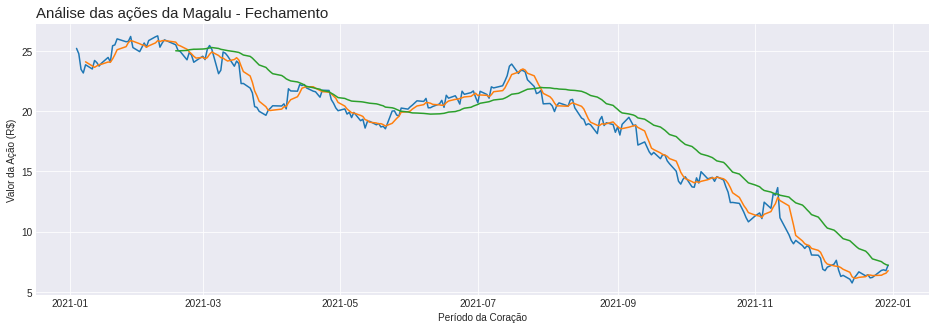

In [71]:
media_movel = dados['Fechamento'].rolling(5).mean()
media_tendencia = dados['Fechamento'].rolling(30).mean()


plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,5))
plt.title('Análise das ações da Magalu - Fechamento',fontsize=15, loc='left')

plt.plot( dados.index, dados['Fechamento']);
plt.plot( dados.index, media_movel);
plt.plot( dados.index, media_tendencia);

plt.xlabel('Período da Coração')
plt.ylabel('Valor da Ação (R$)');

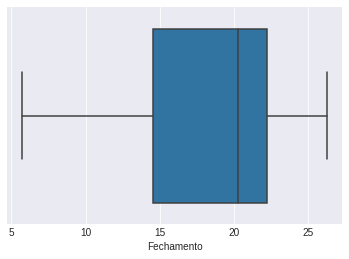

In [72]:
sns.boxplot(data=dados,x='Fechamento')

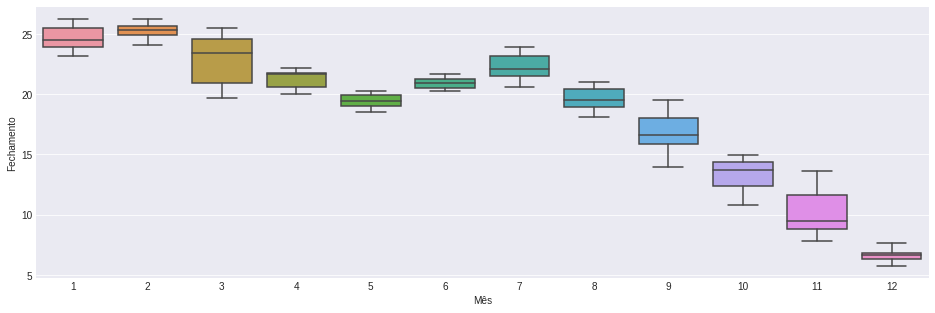

In [73]:
baseDados['Mês'] = baseDados['Data'].dt.month

plt.figure(figsize=(16,5))
sns.boxplot(data=baseDados,x='Mês', y='Fechamento')

In [74]:
baseDados.groupby(['Mês']).describe()['Fechamento']

,count,mean,std,min,25%,50%,75%,max
Mês,,,,,,,,
1,19.0,24.644737,0.960280,23.16,23.9000,24.450,25.4550,26.19
2,18.0,25.208889,0.656021,24.05,24.8775,25.300,25.6500,26.24
3,23.0,22.855217,1.976698,19.65,20.9400,23.390,24.5600,25.44
4,20.0,21.249000,0.735297,20.03,20.5600,21.625,21.7600,22.20
5,21.0,19.430476,0.564973,18.53,18.9700,19.460,19.9000,20.25
6,21.0,20.898095,0.463116,20.27,20.5000,20.890,21.2700,21.67
7,21.0,22.232857,0.977574,20.60,21.5300,22.040,23.1200,23.90
8,22.0,19.656818,0.885827,18.13,18.8975,19.485,20.4525,20.97
9,21.0,16.746190,1.628581,13.94,15.8700,16.570,18.0100,19.48


In [75]:
grafico = go.Figure(
    data=[
          go.Candlestick(
              x= dados.index,
              open = dados['Abertura'],
              high = dados['Maior'],
              low = dados['Menor'],
              close = dados['Fechamento'],
          )
    ]
)

grafico.update_layout( xaxis_rangeslider_visible=False)

grafico.show()